## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [50]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [51]:
df = pd.read_csv('data/clean_df.csv')

#### Show Top 5 Records

In [52]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495,11.190476,Low,0,1,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500,11.190476,Low,0,1,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500,12.368421,Medium,0,1,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950,9.791667,Low,0,1,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450,13.055556,Low,0,1,True,False


In [53]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# Now the "Unnamed: 0" column is dropped from the DataFrame
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495,11.190476,Low,0,1,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500,11.190476,Low,0,1,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500,12.368421,Medium,0,1,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950,9.791667,Low,0,1,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450,13.055556,Low,0,1,True,False


#### Preparing X and Y variables

In [54]:
X = df[['length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-L/100km', 'highway-L/100km', 'wheel-base', 'bore', 'drive-wheels']]

In [55]:
X.head()

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km,wheel-base,bore,drive-wheels
0,0.811148,0.890278,2548,130,111,11.190476,8.703704,88.6,3.47,rwd
1,0.811148,0.890278,2548,130,111,11.190476,8.703704,88.6,3.47,rwd
2,0.822681,0.909722,2823,152,154,12.368421,9.038462,94.5,2.68,rwd
3,0.848630,0.919444,2337,109,102,9.791667,7.833333,99.8,3.19,fwd
4,0.848630,0.922222,2824,136,115,13.055556,10.681818,99.4,3.19,4wd


In [56]:
y = df['price']

In [57]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
196    16845
197    19045
198    21485
199    22470
200    22625
Name: price, Length: 201, dtype: int64

In [58]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [59]:
X = preprocessor.fit_transform(X)

In [60]:
X.shape

(201, 12)

In [61]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((160, 12), (41, 12))

#### Create an Evaluate Function to give all metrics after model Training

In [62]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [63]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2542.0120
- Mean Absolute Error: 1817.5781
- R2 Score: 0.8584
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5409.3355
- Mean Absolute Error: 3664.3689
- R2 Score: 0.7608


Lasso
Model performance for Training set
- Root Mean Squared Error: 2542.0446
- Mean Absolute Error: 1816.5105
- R2 Score: 0.8584
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5410.8196
- Mean Absolute Error: 3664.3696
- R2 Score: 0.7607


Ridge
Model performance for Training set
- Root Mean Squared Error: 2544.7685
- Mean Absolute Error: 1815.5077
- R2 Score: 0.8581
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5421.4614
- Mean Absolute Error: 3663.0554
- R2 Score: 0.7598


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2425.4534
- Mean Absolute Error: 1497.8600


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 907.7130
- Mean Absolute Error: 605.5924
- R2 Score: 0.9819
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3068.2723
- Mean Absolute Error: 1904.3941
- R2 Score: 0.9231


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 215.5625
- Mean Absolute Error: 53.2278
- R2 Score: 0.9990
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2561.9992
- Mean Absolute Error: 1638.0136
- R2 Score: 0.9464


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 412.5635
- Mean Absolute Error: 305.5246
- R2 Score: 0.9963
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3274.7525
- Mean Absolute Error: 1887.5705
- R2 Score: 0.9123


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 1511.4684
- Mean Absolut

### Results

In [64]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.946351
8,AdaBoost Regressor,0.927767
5,Random Forest Regressor,0.923052
7,CatBoosting Regressor,0.912347
4,Decision Tree,0.912067
0,Linear Regression,0.760836
1,Lasso,0.760705
2,Ridge,0.759763
3,K-Neighbors Regressor,0.649977


## XGBRegressor Model

In [69]:
# Create XGBRegressor model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate R^2 score
score_xgb = r2_score(y_test, y_pred_xgb) * 100

# Print accuracy
print("Accuracy of the XGBRegressor model is %.2f" % score_xgb)

Accuracy of the XGBoost model is 94.64


## Plot y_pred and y_test

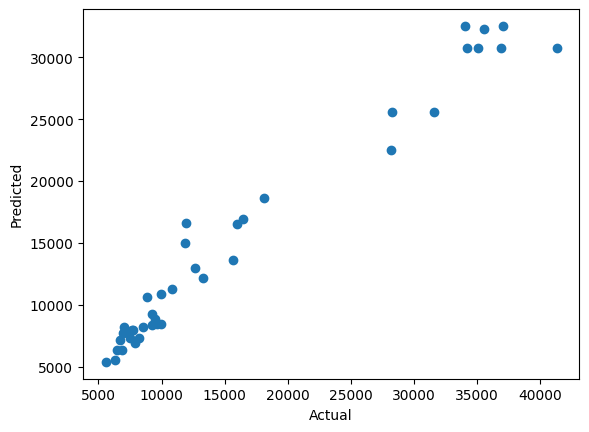

In [70]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

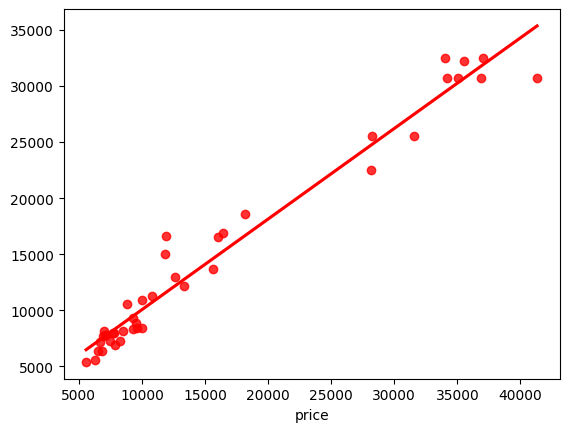

In [71]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [72]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
95,8249,7299.0,950.0
15,41315,30760.0,10555.0
30,6855,6377.0,478.0
158,9258,8358.0,900.0
128,11850,14997.5,-3147.5
115,5572,5389.0,183.0
69,35056,30760.0,4296.0
171,9988,10898.0,-910.0
175,15998,16558.0,-560.0
45,35550,32250.0,3300.0
